<a href="https://colab.research.google.com/github/ccbeltran/Curso.Prep.Henry/blob/master/06_Clase(19_09_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### __Crecimiento de la población de conejos__

Esta ecuación sirve para modelar, por ejemplo, el crecimiento de una población
$$x_{n+1} = rx_n(1-x_n)$$

Donde $x_n$ es un porcentaje de la población máxima actual y $X_{n+1}$ el porcentaje para el próximo año. El valor $r$ es la tasa de crecimiento que es fija.

1. Haga una gráfica del porcentaje de población actual versus la población del año siguiente para cada punto porcentual recibiendo como parámetro un valor de $r$. (parábola invertida)

2. Realiza una simulación de la población para varios periodos de tiempo, dejando una tasa fija. Analiza que pasa para valores de tasa $r = [2.5, 2.9, 3.3, 3.5, 3.56, 3.7]$ identifica a cuantos valores tiende cada valor de tasa dado.

3. Genera un gráfico de la tasa versus el procentaje de población (no usar numpy). Ten en cuenta que par valores de tasa entre 3 y 4 pueden ocurrir más de un valor de población.

video recomendado: [Esta ecuación cambiará tu forma de ver el mundo](https://www.youtube.com/watch?v=EOvLhZPevm0&t=912s)

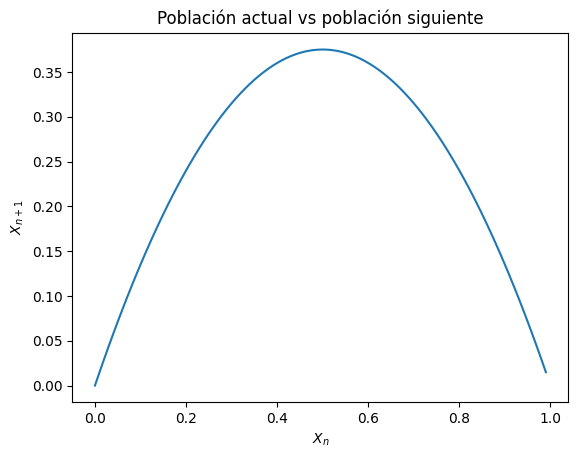

In [11]:
# Celda de código para probar
import matplotlib.pyplot as plt
r = 1.5
x = [i/100 for i in range(100)]
y = [r*i*(1-i) for i in x]
plt.plot(x,y)
plt.xlabel('$X_n$')
plt.ylabel('$X_{n+1}$')
plt.title('Población actual vs población siguiente')
plt.show()

[0.05,
 0.168625,
 0.49767666328125,
 0.8874808374780442,
 0.35449803208496294,
 0.812343579531623,
 0.5411672835550732,
 0.8814836544146715,
 0.37086928602121766,
 0.8283046684110211,
 0.5048669586833295,
 0.8874159101317703,
 0.3546766396475407,
 0.8125279793223359,
 0.5407582305994765,
 0.8816026215663196,
 0.3705470092086785,
 0.8280088272718962,
 0.5055562427725896,
 0.8873904049901946]

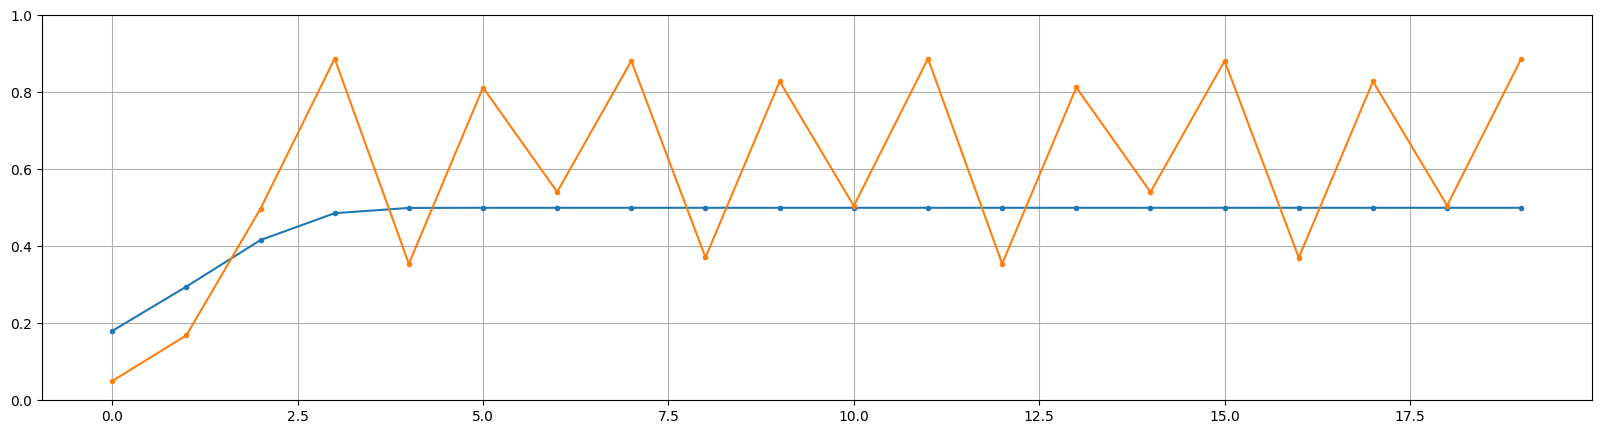

In [25]:
# Validar cuando la población de conejos se estabilice
def logistica(r,x):
    return r*x*(1-x)

t = list(range(200))
x0 = 0.9
r = 2
xn = []
for i in t:
    x0 = logistica(r,x0)
    xn.append(x0)
fig, ax = plt.subplots(figsize=(20,5))
#    print(x0)
plt.plot(t,xn, '.-')

x1 = 0.05
r = 3.55
xn1 = []
for i in t:
    xn1.append(x1)
    x1 = logistica(r,x1)
plt.plot(t,xn1, '.-')
plt.ylim(0,1)
plt.grid()
xn1


{0.4519632476, 0.8421543994}

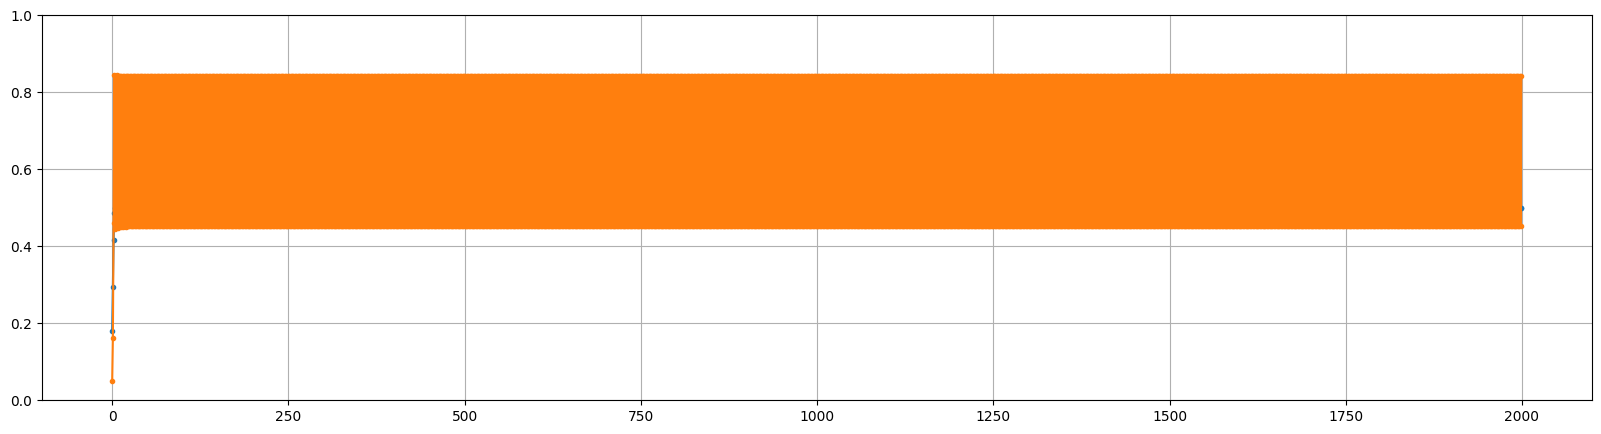

In [28]:
def logistica(r,x):
    return r*x*(1-x)

t = list(range(2000))
x0 = 0.9
r = 2
xn = []
for i in t:
    x0 = logistica(r,x0)
    xn.append(x0)
fig, ax = plt.subplots(figsize=(20,5))

plt.plot(t,xn, '.-')

x1 = 0.05
r = 3.4
xn1 = []
for i in t:
    xn1.append(round(x1,10))
    x1 = logistica(r,x1)
plt.plot(t,xn1, '.-')
plt.ylim(0,1)
plt.grid()
unicos = set(xn1[1000:])
unicos

423293

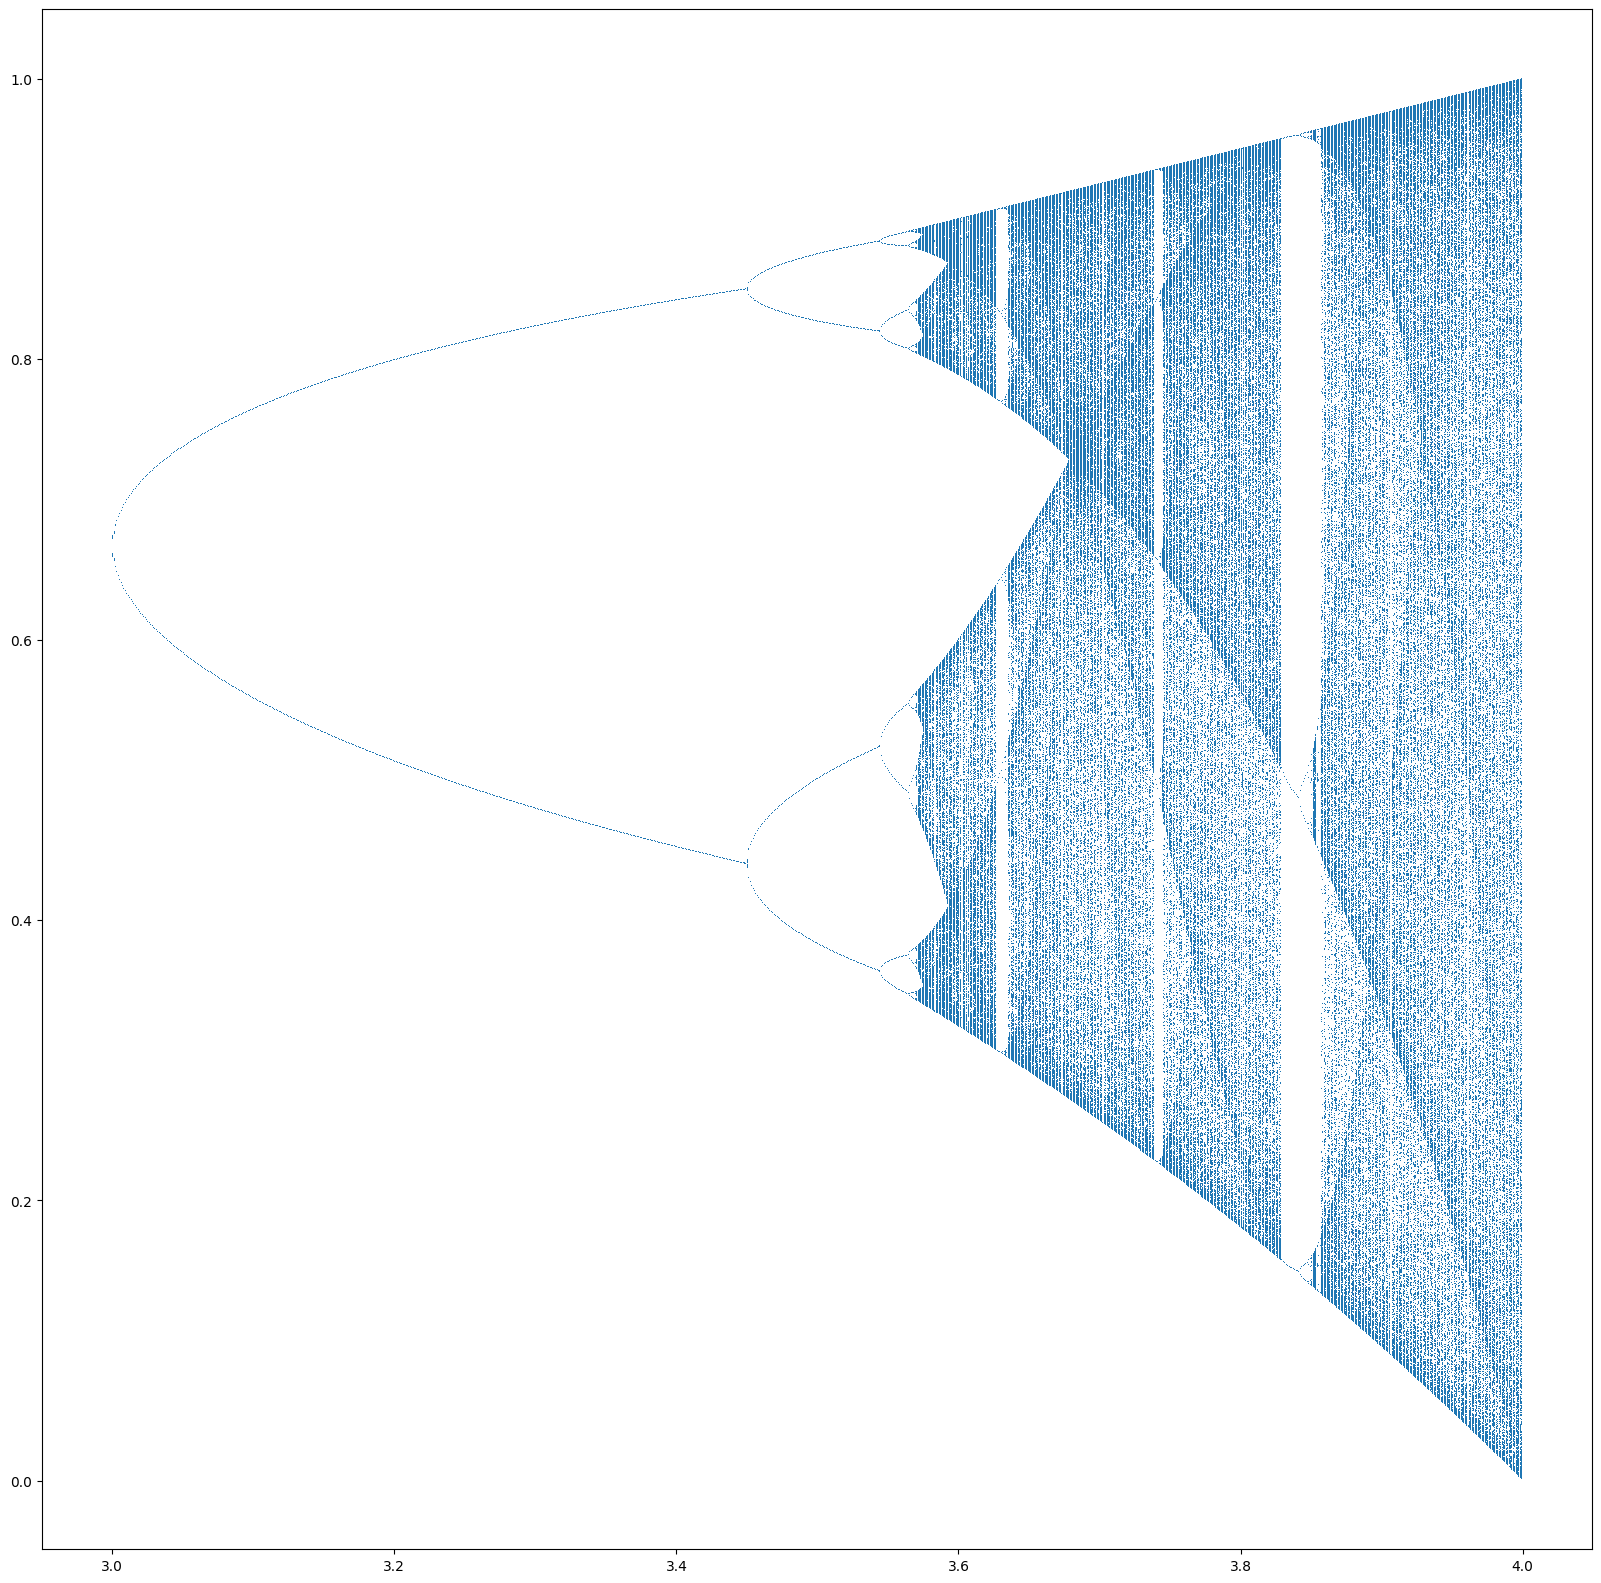

In [39]:
R = []
X = []
x0 = 0.5
for i in range(1000):
    r = i/1000+3
    xn = []
    for i in range(2000):
        xn.append(x0)
        x0 = logistica(r,x0)
    unicos = set(xn[1000:])
    for u in unicos:
        R.append(r)
        X.append(u)
plt.subplots(figsize=(20,20))
plt.plot(R,X, ',')
len(R)


### __Acuerdo entre médicos__

Un hospital está evaluando la precisión de dos radiólogos en la interpretación de radiografías de tórax para diagnosticar la presencia o ausencia de neumonía en pacientes. Cada radiólogo revisa las radiografías de N pacientes de forma independiente, y las clasifica en dos categorías: "Neumonía" o "No Neumonía".

Los resultados de las clasificaciones de ambos radiólogos deben ser comparados para evaluar su nivel de acuerdo más allá de lo que podría esperarse por pura casualidad. Para ello, se te pide crear un algoritmo que calcule el coeficiente de kappa de Cohen, con el fin de determinar el grado de concordancia entre ambos profesionales.

$$\kappa = \frac{p_0 - p_e}{1-p_e}$$

Donde:

$p_0$ es la proporción observada de acuerdo entre los radiólogos.

$p_e$ es la proporción esperada de acuerdo por azar.

El algoritmo debe imprimir el valor de kappa y determinar el nivel de acuerdo según la escala siguiente:

- Kappa > 0.80: Excelente acuerdo.
- Kappa entre 0.60 y 0.80: Buen acuerdo.
- Kappa entre 0.40 y 0.60: Acuerdo moderado.
- Kappa entre 0.20 y 0.40: Acuerdo pobre.
- Kappa < 0.20: Acuerdo muy bajo.

In [ ]:
# Celda de código para probar

## __Ejercicios de Algoritmos de listas__

> - Para los siguientes ejercicios no se deben utilizar funciones externas o de python. La idea es crear funciones propias.
- En los siguientes ejercicios, primero determine los pasos que solucionan el problema, luego codifique la solución, pruebe los pasos uno a uno hasta obtener la solución completa, y finalmente convierta el resultado en una función.
    1. Hacer una función que busca un valor en una lista y devuelve la cantidad de veces que aparece el valor dado y una lista con las posiciones (índices) en donde se encuentra el valor. La función recibe la lista y el valor a buscar. Por ejemplo;
    `entrada: ([1,8,2,8,8,4,7,8,8,2,8,3,8,7,6], 8) salida: (7, [1,3,4,7,8,10,12]`
    2. Diseñe un algoritmo que recibe dos listas de valores numéricos y busca la secuencia completa de valores de la segunda lista dentro de la primera lista. El algoritmo devuelve el índice en donde se inicia la coincidencia completa. En este ejercicio no se pueden usar otras funciones ni librerias Por ejemplo:
    `entrada: ([1,2,2,2,3,2,3,7,2,6,7], [2,3,7]) salida: (5)`
    2. Se requiere un algoritmo que halle el valor máximo de una lista que se da como entrada. El algoritmo devuelve el valor máximo, las veces que se aparece y una lista con las posiciones (los índices) en donde se encuentra el máximo.
    3. Hallar el valor promedio de una lista de valores.
    3. Dada una lista de valores, halle la desviación estándar.
    3. Dada una lista de valores, halle el valor de la Curtosis.
    3. Diseñe un algoritmo que calcule la mediana de una lista de valores.
    4. Diseñe una función que recibe una lista de valores y devuelve una lista en donde se eliminan los valores únicos. Por ejemplo:
    `Entrada: ([8,7,3,9,4,12,6,4,3,7,0,8,5,6,21,11,6,1,2,5]) Salida: ([8,7,3,4,6,4,3,7,8,5,6,6,5])` <br>Observe que en este ejemplo se eliminaron los valores `[9,12,0,21,11,1,2]`
    4. Dada la fórmula del sesgo positivo, diseñe un algoritmo que lo calcule a partir de una lista de valores.
$$ sp = \frac{1}{N-1}\sum_{i=1}^N \frac{1}{1+e^{-f\cdot y_i}}$$
donde $N$ es la cantidad de muestras, $f$ es el factor de multiplicación que puede ser 4, 8, o 16, y $y$ es:

$$ y_i = \frac{(x_i-\mu)}{\sigma}$$




In [ ]:
# Celda de código para probar

In [ ]:
# rx(1-x)
